## Stock analysis

In [21]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [22]:
os.environ["TIINGO_API_KEY"] = '619de6ab14d85e70ea0e5b664a6722d5d83f7c1a'

In [23]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [24]:
def clean_bank(ticker):
    df = data.DataReader(ticker, 'tiingo', start, end)
    df = df[['open', 'high', 'low', 'close', 'volume']]
    df.index = df.index.droplevel(0)
    return df

In [25]:
BAC = clean_bank('BAC')
C = clean_bank('C')
GS = clean_bank('GS')
JPM = clean_bank('JPM')
MS = clean_bank('MS')
WFC = clean_bank('WFC')

tickers=['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [26]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [27]:
bank_stocks.head()

Bank Ticker                  BAC                                     C         \
Stock Info                  open   high    low  close    volume   open   high   
date                                                                            
2006-01-03 00:00:00+00:00  46.92  47.18  46.15  47.08  16296700  49.00  49.38   
2006-01-04 00:00:00+00:00  47.00  47.24  46.45  46.58  17757900  48.86  49.10   
2006-01-05 00:00:00+00:00  46.58  46.83  46.32  46.64  14970700  48.44  48.78   
2006-01-06 00:00:00+00:00  46.80  46.91  46.35  46.57  12599800  48.88  48.90   
2006-01-09 00:00:00+00:00  46.72  46.97  46.36  46.60  15619400  48.60  48.74   

Bank Ticker                                        ...     MS                  \
Stock Info                   low  close    volume  ...   open   high      low   
date                                               ...                          
2006-01-03 00:00:00+00:00  48.11  49.29  15376000  ...  57.17  58.49  56.7400   
2006-01-04 00:00:00+00:00  48.35  48.38  18709000  ...  58.70  59.28  58.3500   
2006-01-05 00:00:00+00:00  48.40  48.62  11431000  ...  58.55  58.59  58.0200   
2006-01-06 00:00:00+00:00  48.20  48.62  13702000  ...  58.77  58.85  58.0500   
2006-01-09 00:00:00+00:00  48.30  48.39  16807000  ...  58.63  59.29  58.6244   

Bank Ticker                                  WFC                                
Stock Info                 close   volume   open   high    low  close   volume  
date                                                                            
2006-01-03 00:00:00+00:00  58.31  5377000  63.20  63.95  62.39  63.80  5508200  
2006-01-04 00:00:00+00:00  58.35  7977800  63.60  63.64  62.73  63.06  5435000  
2006-01-05 00:00:00+00:00  58.51  5778000  63.00  63.11  62.62  62.99  5079000  
2006-01-06 00:00:00+00:00  58.57  6889800  63.16  63.55  62.77  63.36  4201900  
2006-01-09 00:00:00+00:00  59.19  4144500  63.35  63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

### EDA

In [28]:
# Max closing price
bank_stocks.xs('close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

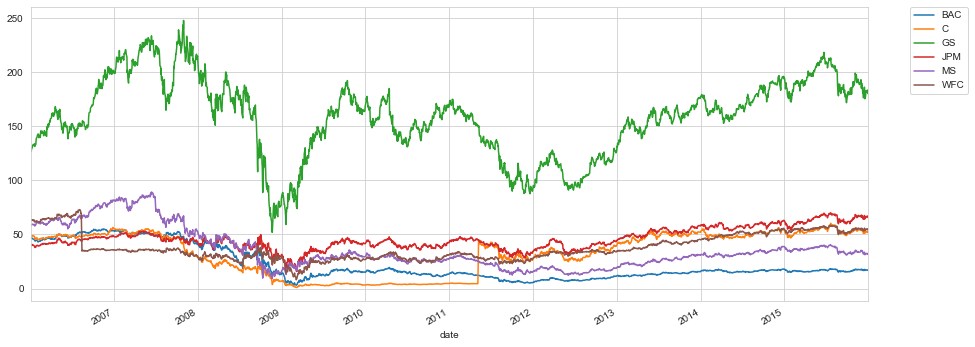

In [44]:
bank_stocks.xs('close', level='Stock Info', axis=1).plot(figsize=(15,6))
plt.legend(close_price, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
bank_stocks.xs('close', level='Stock Info', axis=1).iplot()

### Looking at daily stock returns

In [31]:
returns = pd.DataFrame()

def input_returns(ticker):
    returns[ticker] = bank_stocks.xs('close', level='Stock Info', axis=1)[ticker].pct_change()

In [32]:
input_returns(tickers)

In [33]:
returns.head()

,BAC,C,GS,JPM,MS,WFC
date,,,,,,
2006-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00+00:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00+00:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09 00:00:00+00:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


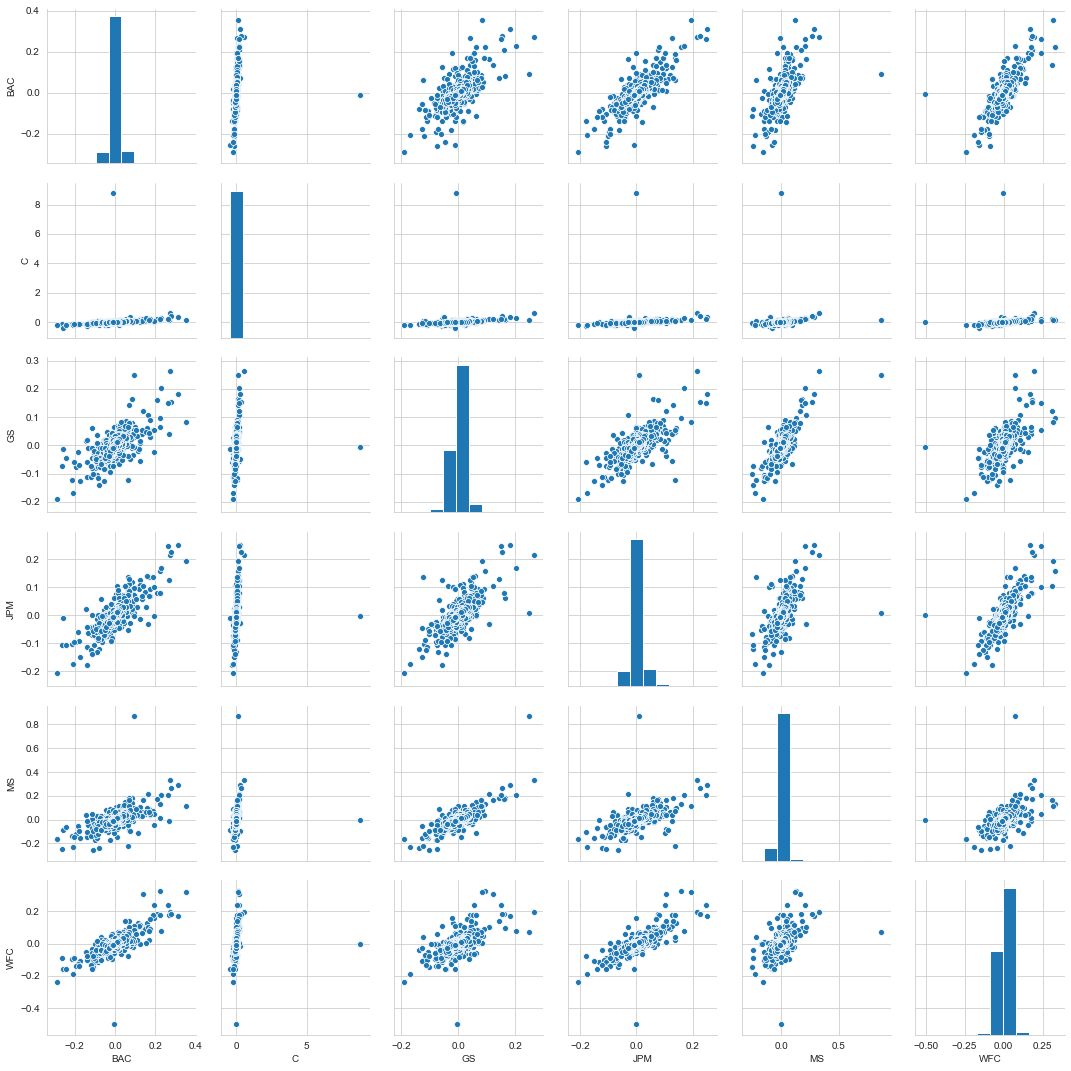

In [35]:
sns.pairplot(returns[1:])

In [36]:
returns.max()

BAC    0.352691
C      8.769912
GS     0.264678
JPM    0.250967
MS     0.869835
WFC    0.327645
dtype: float64

In [37]:
returns.idxmax()

BAC   2009-04-09 00:00:00+00:00
C     2011-05-09 00:00:00+00:00
GS    2008-11-24 00:00:00+00:00
JPM   2009-01-21 00:00:00+00:00
MS    2008-10-13 00:00:00+00:00
WFC   2008-07-16 00:00:00+00:00
dtype: datetime64[ns, UTC]

In [38]:
returns.min()

BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
WFC   -0.502084
dtype: float64

In [39]:
returns.idxmin()

BAC   2009-01-20 00:00:00+00:00
C     2009-02-27 00:00:00+00:00
GS    2009-01-20 00:00:00+00:00
JPM   2009-01-20 00:00:00+00:00
MS    2008-10-09 00:00:00+00:00
WFC   2006-08-14 00:00:00+00:00
dtype: datetime64[ns, UTC]

In [40]:
returns.std()

BAC    0.036617
C      0.179065
GS     0.025357
JPM    0.027651
MS     0.037831
WFC    0.031841
dtype: float64

In [41]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

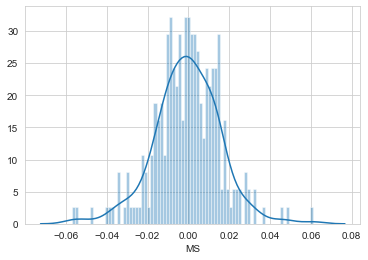

In [42]:
MS_2015_return = returns.loc['2015-01-01':'2015-12-31']['MS']
sns.distplot(MS_2015_return, bins=80)

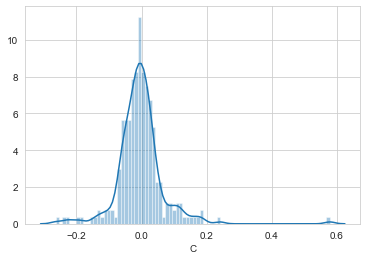

In [43]:
C_2008_return = returns.loc['2008-01-01':'2008-12-31']['C']
sns.distplot(C_2008_return, bins=80)

### Moving averages

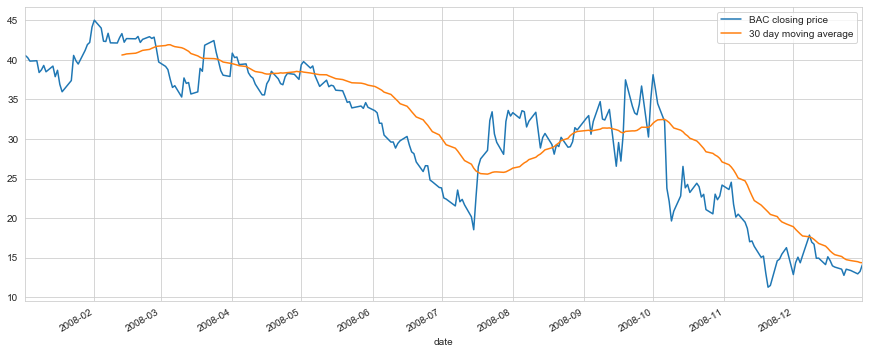

In [46]:
BAC_2008_close = bank_stocks.xs('close', level='Stock Info', axis=1).loc['2008-01-01':'2008-12-31']['BAC']

BAC_2008_close.plot(figsize=(15,6),label='BAC closing price')
BAC_2008_close.rolling(30).mean().plot(label='30 day moving average')
plt.legend()

### Closing correlation

(6.0, 0.0)

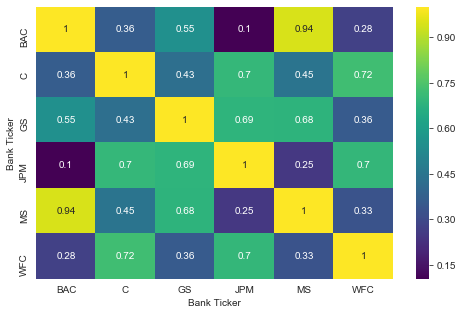

In [49]:
plt.figure(figsize=(8,5))
ax = sns.heatmap(bank_stocks.xs('close', level='Stock Info', axis=1).corr(), cmap='viridis', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [55]:
bank_stocks.xs('close', level='Stock Info', axis=1).corr().iplot(kind='heatmap', colorscale='rdylbu')

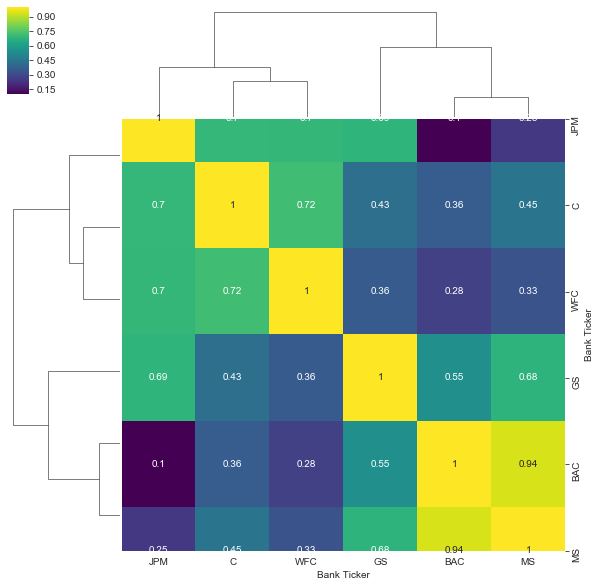

In [50]:
sns.clustermap(bank_stocks.xs('close', level='Stock Info', axis=1).corr(), cmap='viridis', annot=True)

## Cufflinks

### Candle plot

In [51]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

### Simply moving averages

In [52]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

### Bollinger band plot

In [53]:
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')